# Assignment 2: Evaluating Linear Models

-----------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-------------------------------

**Your Name Here:** Abishek Karnan Rajesh

Put all of your skills to work on a basic modeling example! And let's see if we can use ChatGPT to help deepen your learning on this topic.

First things first, [Download the CT Real Estate Transactions data here](https://drive.google.com/file/d/12m6UYYt0Osa3JLLfPZRLlBipRUS9ixGd/view?usp=sharing), drag onto your Google Drive, make a shareable link and download it with `!gdown`, then read the dataframe as `df`. Then...


In [2]:
# here is a nice way to download as a shareable link - you just need to 'steal' the ID of the file and you can use gdown
# after you run this, the file will be downloaded to your local runtime and your are ready to rock!
# of course, local files on your runtime are deleted after you close the session, but this is OK.

# https://drive.google.com/file/d/1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ/view?usp=sharing
!gdown 1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ

Downloading...
From: https://drive.google.com/uc?id=1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ
To: /content/Real_Estate_Sales_2014-2016.csv
100% 15.4M/15.4M [00:00<00:00, 107MB/s] 


In [3]:
import pandas as pd
df = pd.read_csv('Real_Estate_Sales_2014-2016.csv')


# Part 1a: Use ChatGPT to generate a regression recipe
I used to give this as the homework, where students had to reference my materials and documentation to solve this notebook. ChatGPT is actually pretty slick  and can generate a basic regression recipe for you. So... why not see what it can do?! Copy and paste these instructions into ChatGPT and ask it to write a Python code to solve this homework. Copy and paste it, update it if needed, and run it.

* Q1) Drop any rows where the `AssessedValue` is greater than 1 million USD
* Q2) Count how many rows have missing values, then drop any rows with missing values.
* Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.
* Q4) Count how many unique values are in the `Town` column.
* Q5) Make a new dataframe called `tmp` of dummy variables for each value in the `Town` column. (hint: this dataframe should have somewhere around 127055 rows and 169 columns, one column for each town).
* Q6) Make a new dataframe called `X` that subsets the `AssessedValue` and `ListYear` from `df`, and concatenate with your dataframe called `tmp`. Hint: This dataframe should have 171 columns.
* Q7) Subset `SaleAmount` from `df` and assign to a variable called `y`.
* Q8) Convert `X` and `y` to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.
* Q9) Fit a linear regression model. Calculate mean absolute error for each partition.
* Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers. You should use a log axis each axis so that outliers don't dominate your plot.

* `plt.xscale('log')`
* `plt.yscale('log')`

Please use nice subheaders for each question so that your code is easy to review.



## Your ChatGPT Screenshot
Make sure the screenshot of time and date is included in the image.

In [4]:
# students: paste both a screenshot of your prompt and code
# (for academic integrity) and your actual ChatGPT python code here

### Q1

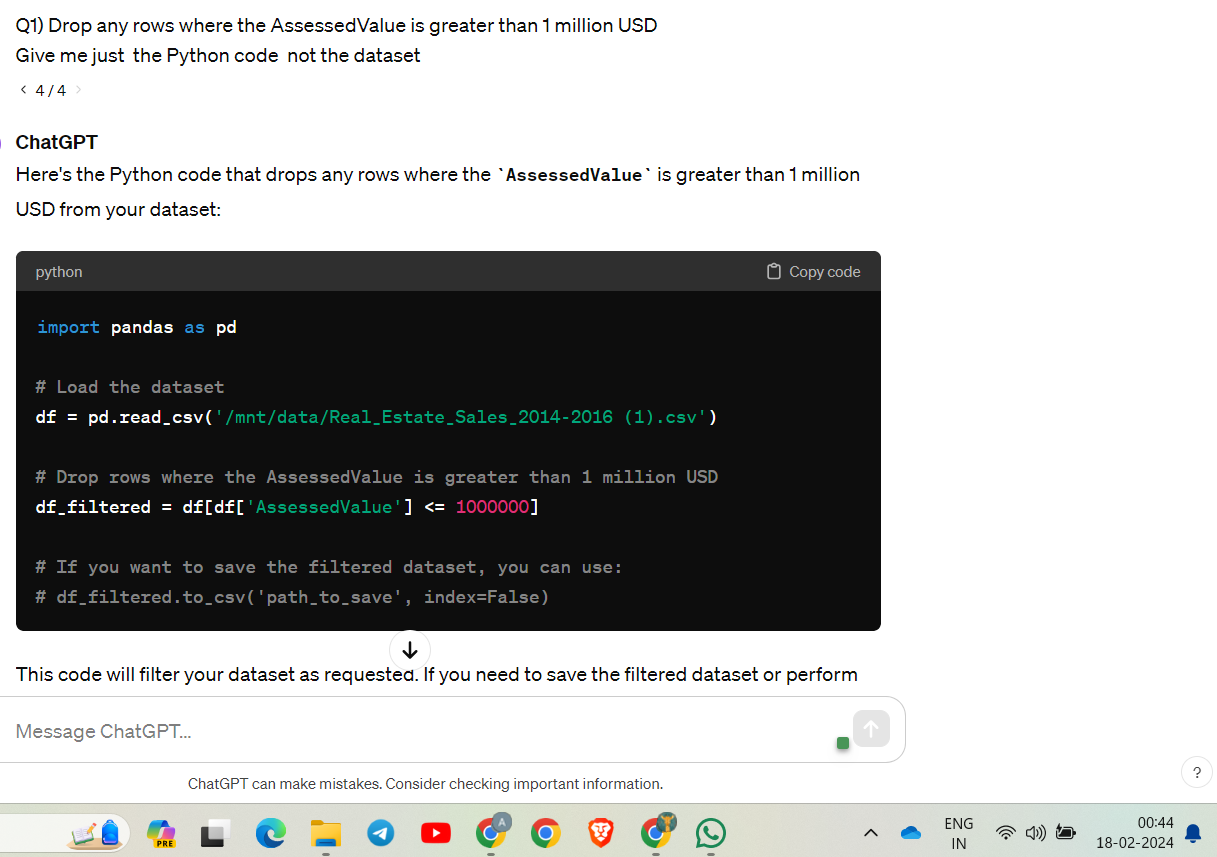

### Q2

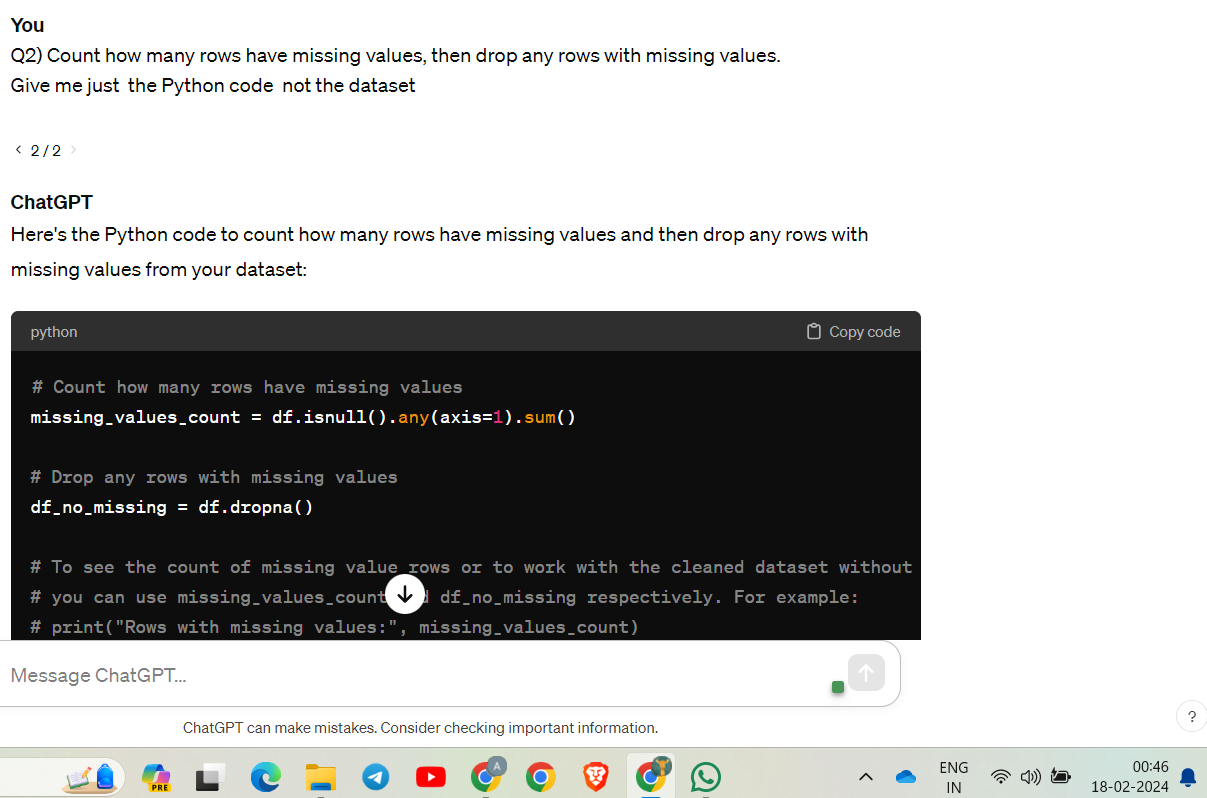

### Q3

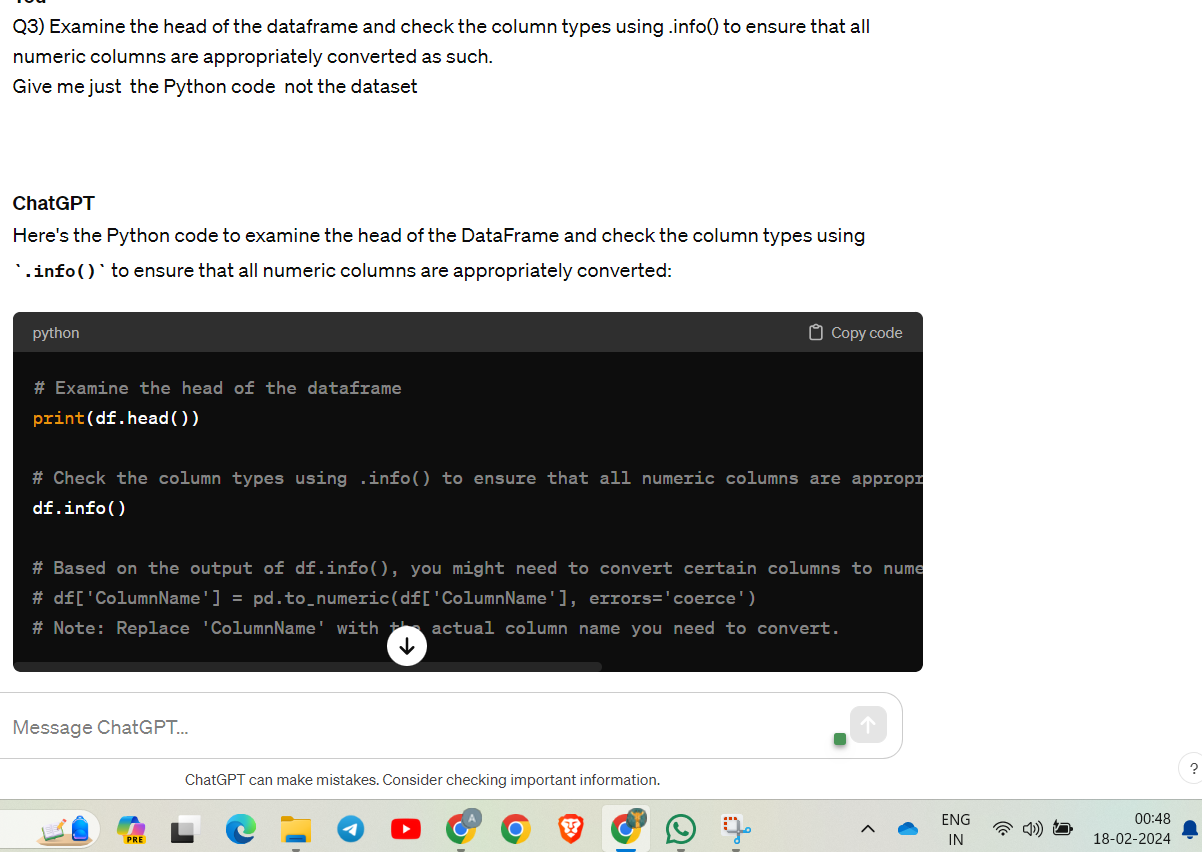

###Q4

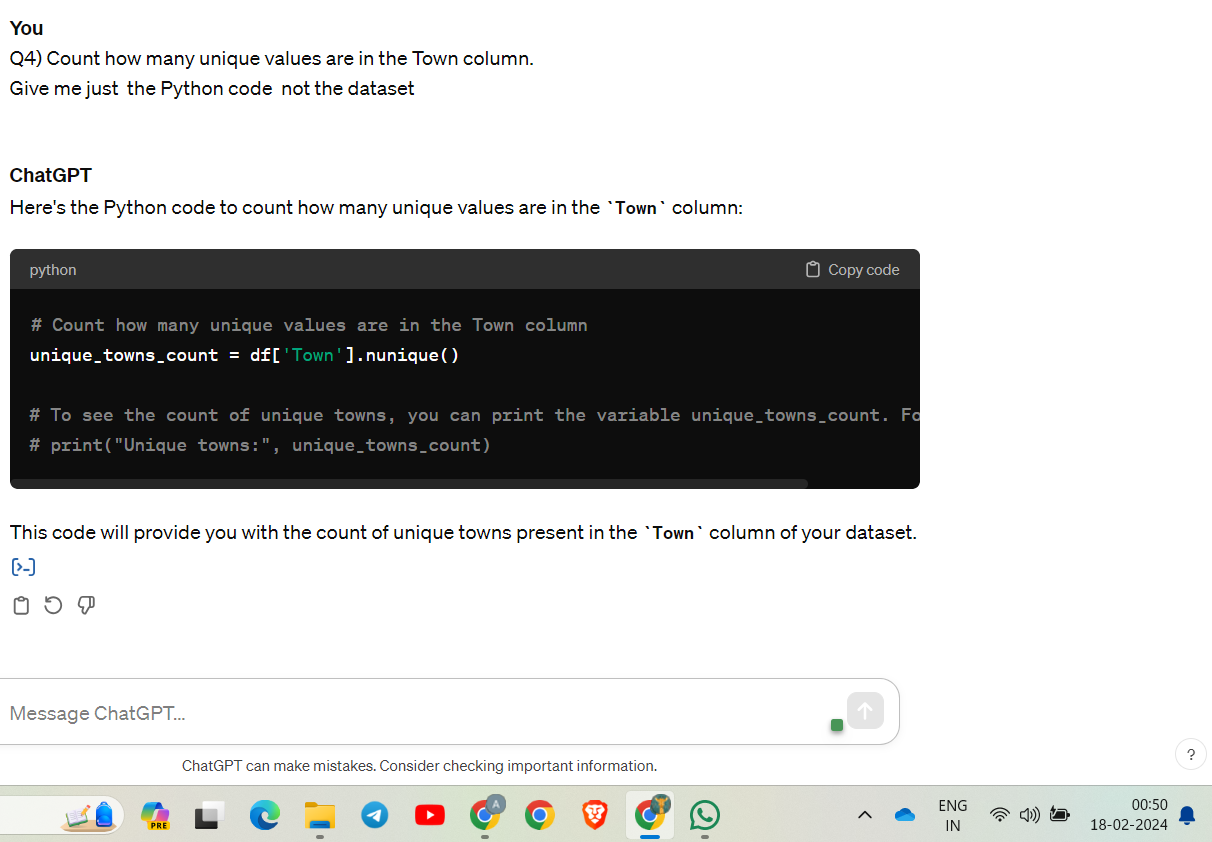

###Q5

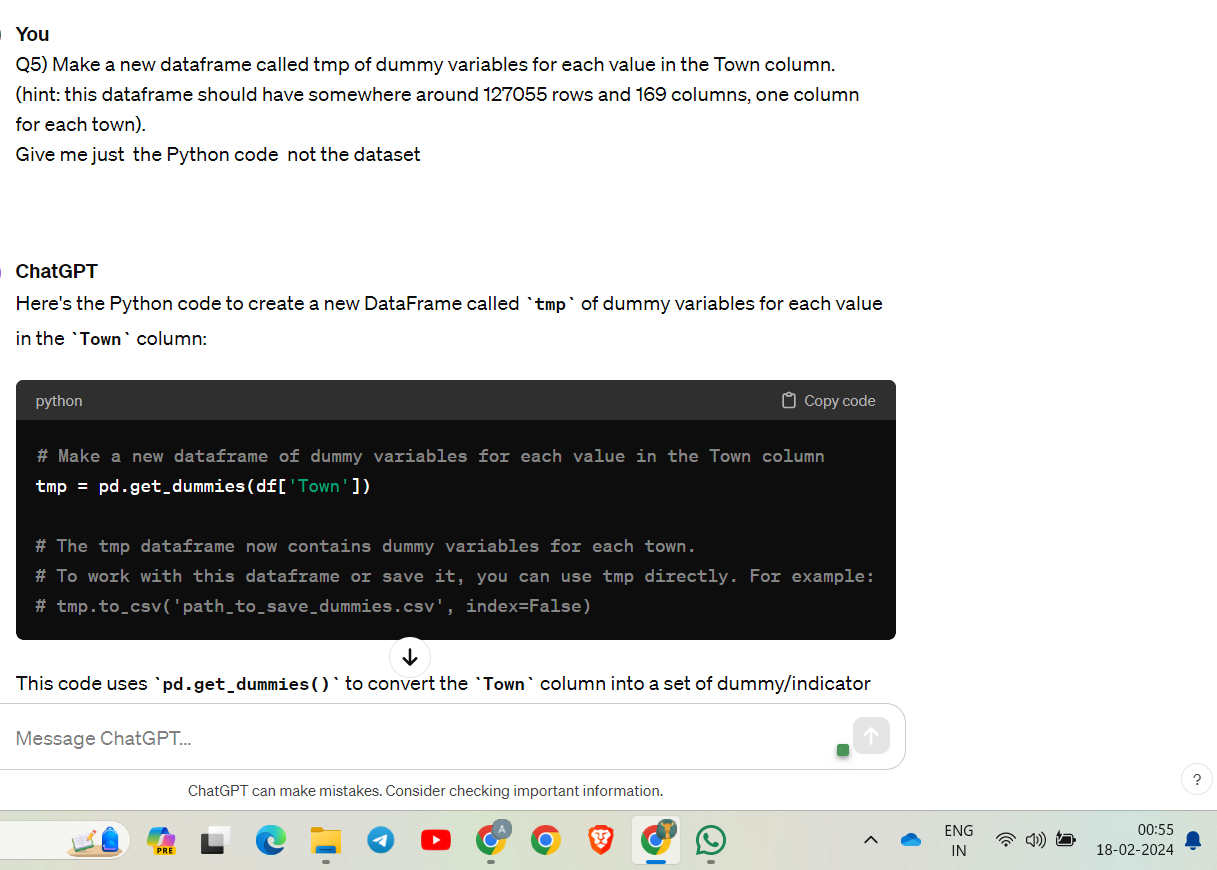

###Q6

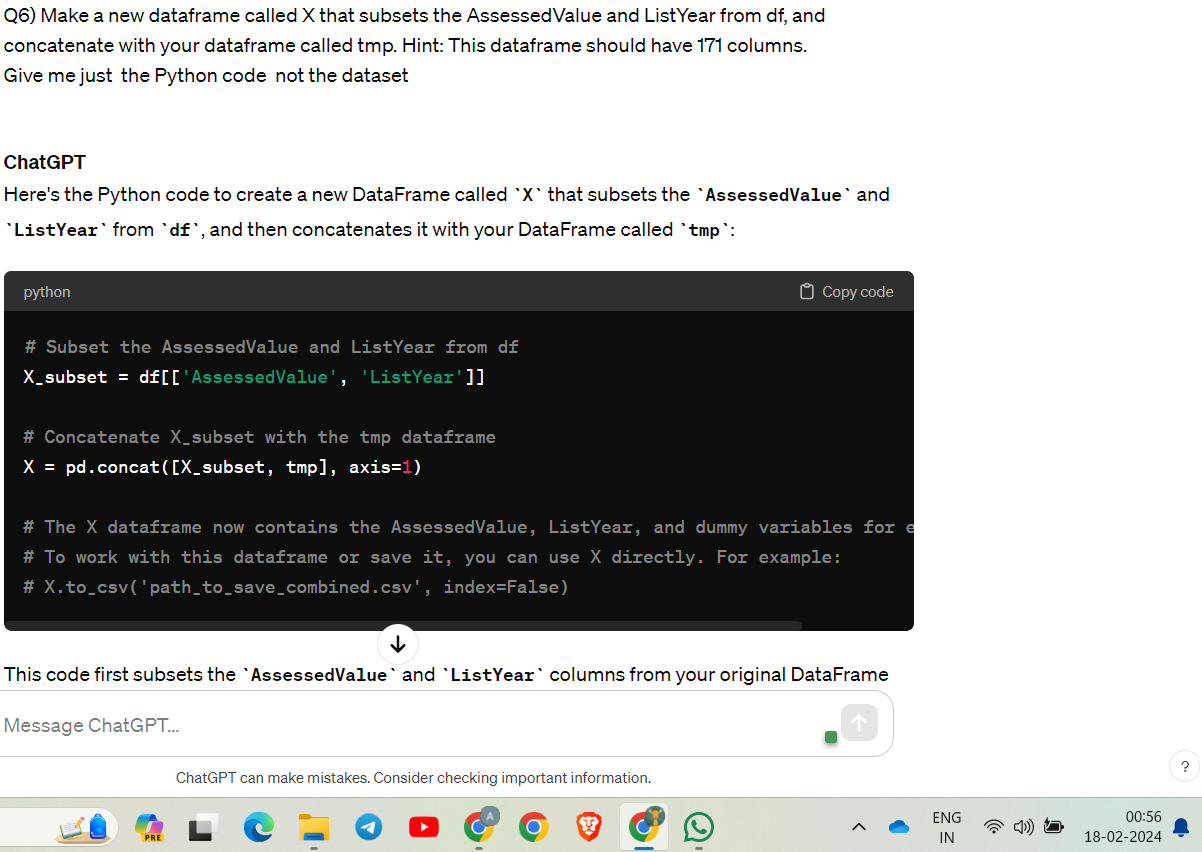

###Q7

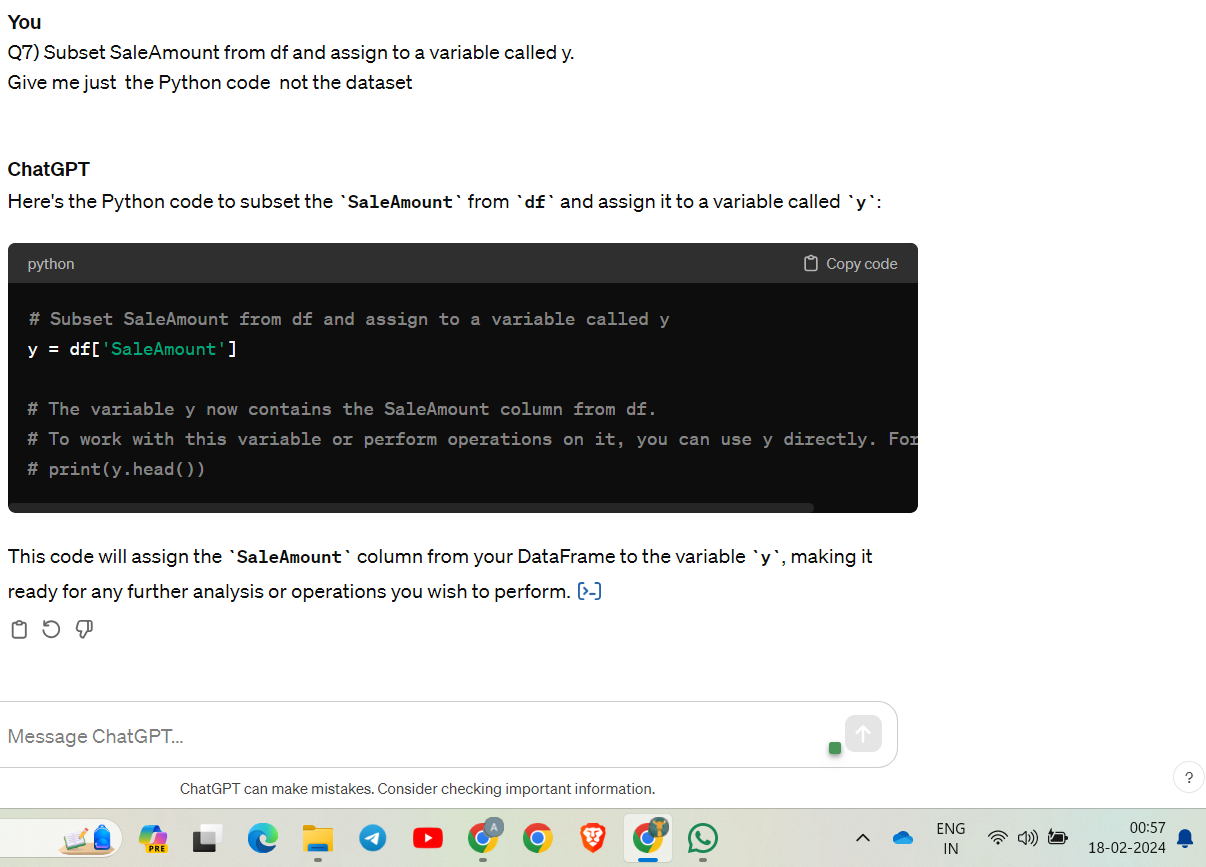

###Q8

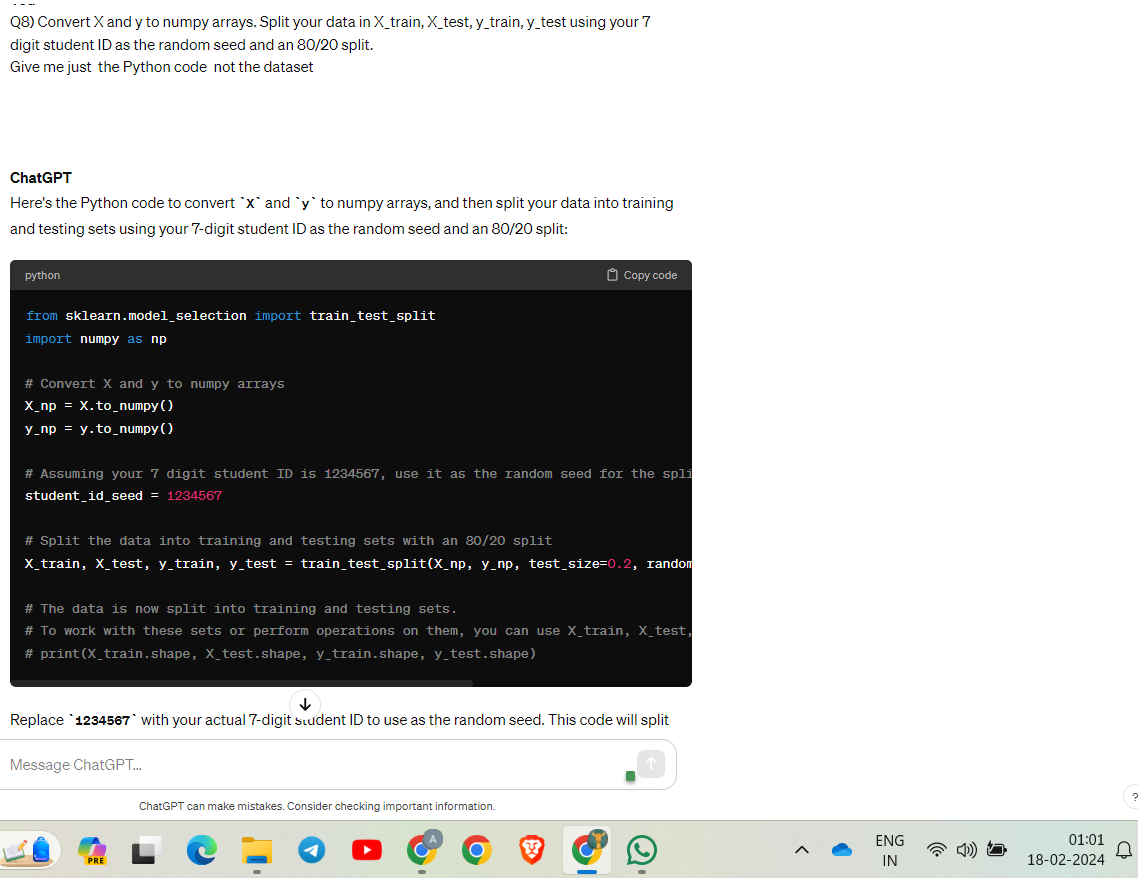

###Q9

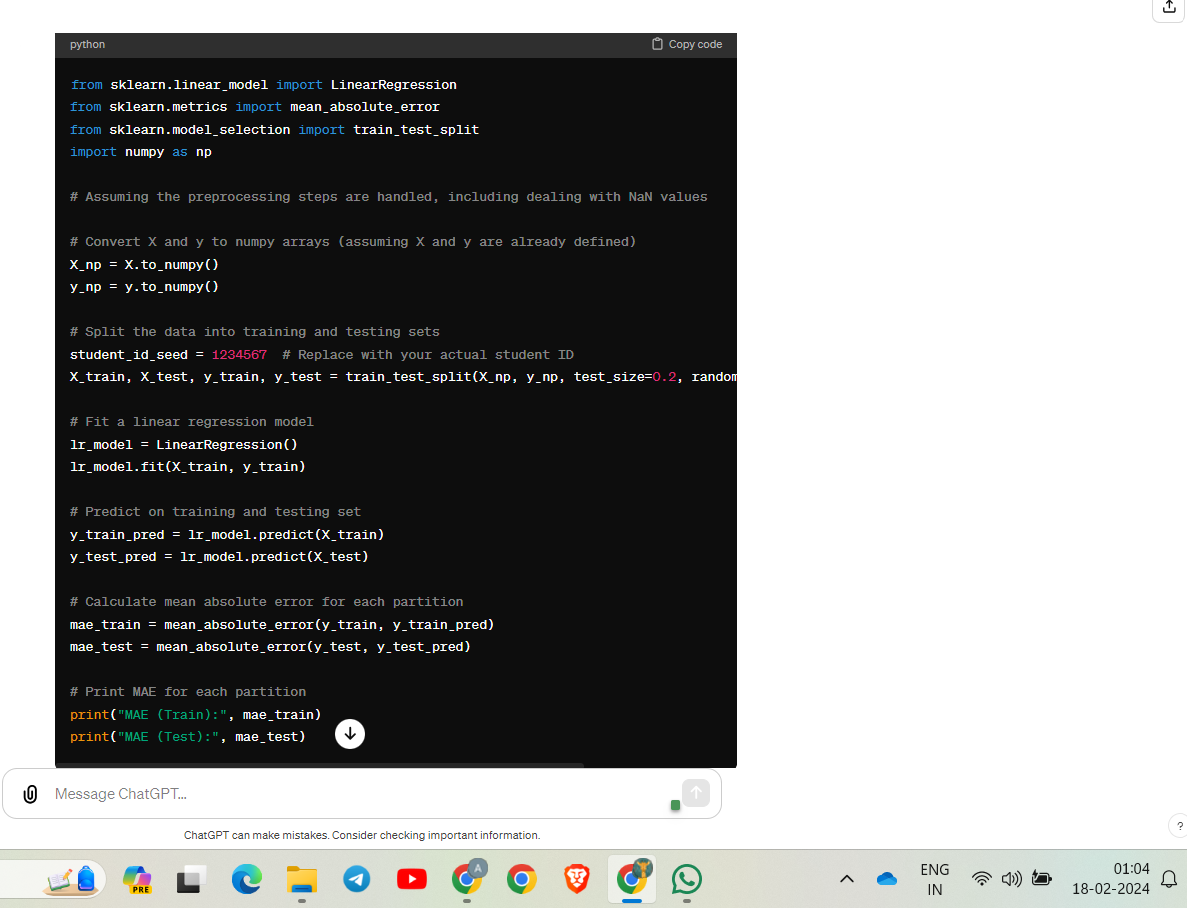

###Q10

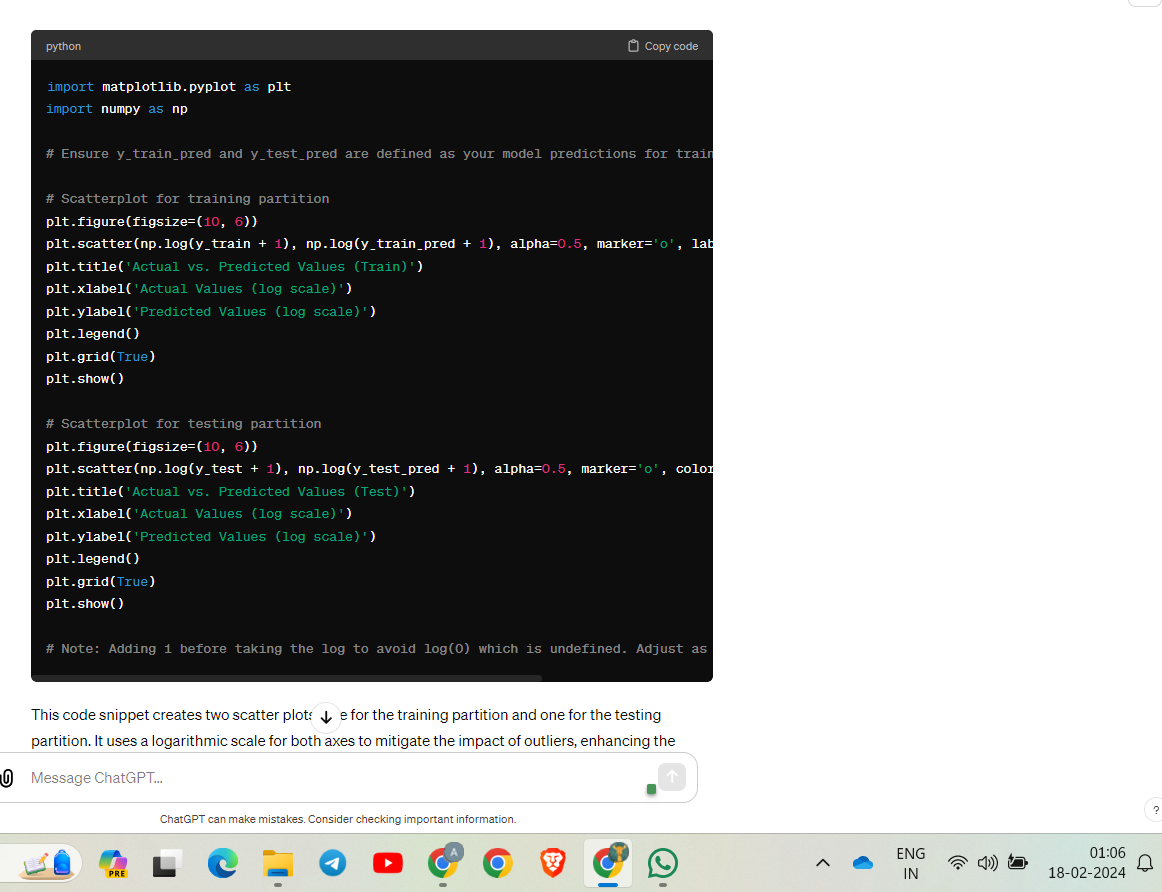

#Q11 & Q12

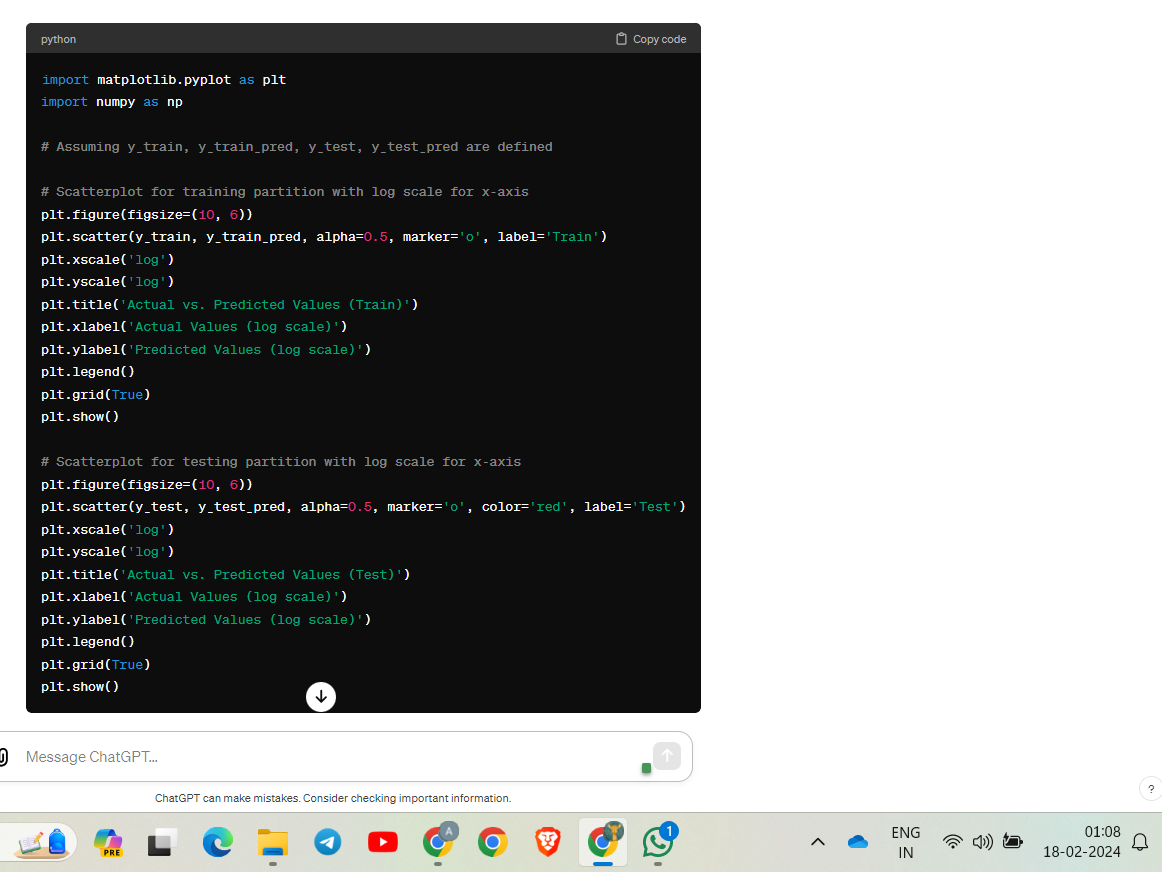

## Your ChatGPT Code
Don't just copy/paste as one cell, make nice subheaders for each question please.

## Q1) Drop any rows where the AssessedValue is greater than 1 million USD

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [6]:
df = df[df['AssessedValue'] <= 1_000_000]

## Q2) Count how many rows have missing values, then drop any rows with missing values.

In [7]:
missing_values_count = df.isnull().sum().sum()
df = df.dropna()

## Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such

In [27]:
print(df.head())
print(df.info())

   ID  SerialNumber  ListYear DateRecorded     Town            Address  \
1   2         14011      2014    1/14/2015  Andover    1 JUROVATY LANE   
2   3         15006      2015   11/30/2015  Andover        1 ROSE LANE   
3   4         14044      2014    9/28/2015  Andover  10 PINE RIDGE  DR   
4   5         14035      2014    8/10/2015  Andover       101 WALES RD   
5   6         15051      2015    9/28/2016  Andover    107 LAKESIDE DR   

   AssessedValue  SaleAmount  SalesRatio PropertyType ResidentialType  Target  \
1         153100    190000.0    0.805789  Residential   Single Family       0   
2         102900     50000.0    2.058000  Residential   Single Family       0   
3         108700    128368.0    0.846784  Residential   Single Family       0   
4         164000    230000.0    0.713043  Residential   Single Family       0   
5         188400    226000.0    0.833628  Residential   Single Family       0   

   HighValue  
1          0  
2          0  
3          0  
4       

## Q4) Count how many unique values are in the Town column.

In [9]:
unique_towns = df['Town'].nunique()


## Q5) Make a new dataframe called tmp of dummy variables for each value in the Town column. (hint: this dataframe should have somewhere around 127055 rows and 169 columns, one column for each town).

In [10]:
tmp = pd.get_dummies(df['Town'])


## Q6) Make a new dataframe called X that subsets the AssessedValue and ListYear from df, and concatenate with your dataframe called tmp. Hint: This dataframe should have 171 columns.

In [11]:
X = pd.concat([df[['AssessedValue', 'ListYear']], tmp], axis=1)


## Q7) Subset SaleAmount from df and assign to a variable called y.

In [12]:
y = df['SaleAmount']


## Q8) Convert X and y to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.

In [13]:
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234567)  # Replace 1234567 with your student ID


## Q9) Fit a linear regression model. Calculate mean absolute error for each partition.

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

## Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers. You should use a log axis each axis so that outliers don't dominate your plot

In [15]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

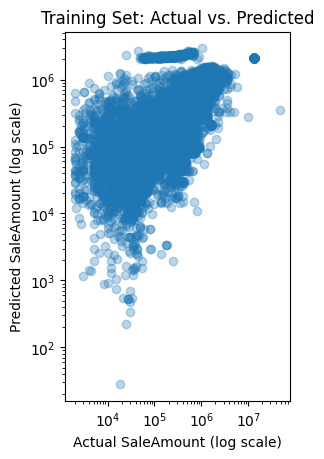

In [16]:
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.title('Training Set: Actual vs. Predicted')
plt.xlabel('Actual SaleAmount (log scale)')
plt.ylabel('Predicted SaleAmount (log scale)')
plt.xscale('log')
plt.yscale('log')

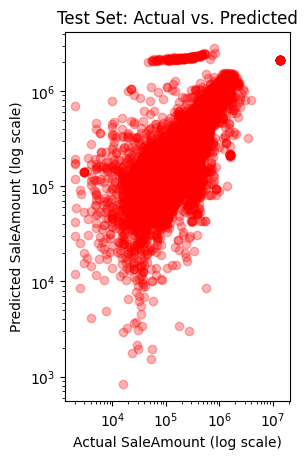

In [17]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3, color='red')
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Actual SaleAmount (log scale)')
plt.ylabel('Predicted SaleAmount (log scale)')
plt.xscale('log')
plt.yscale('log')

In [18]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

###plt.xscale('log')

###plt.yscale('log')

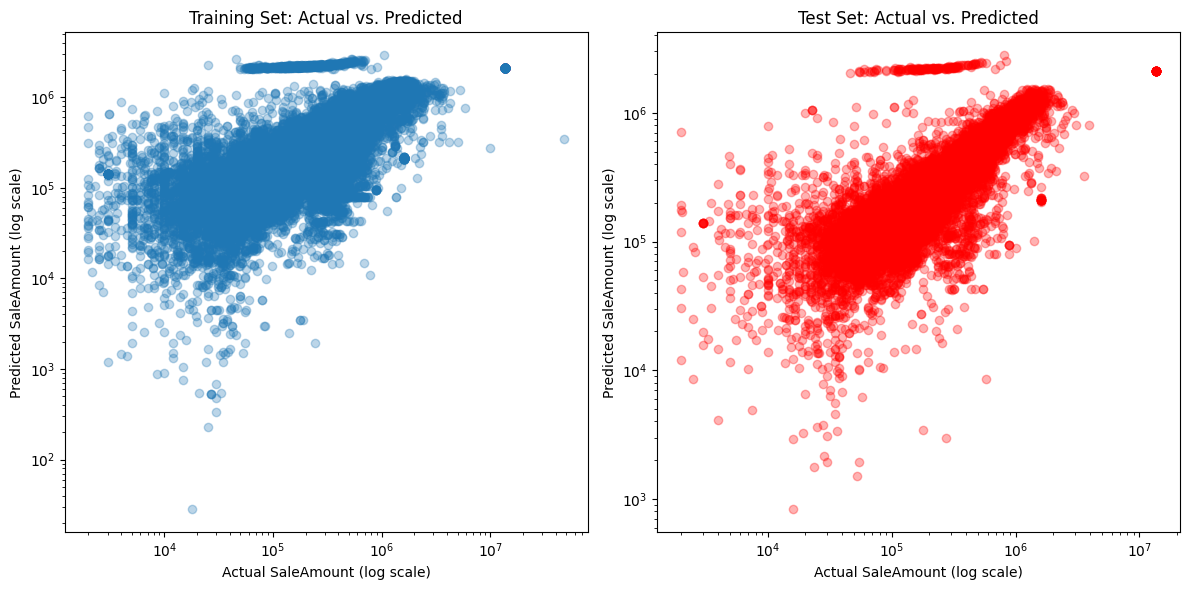

In [19]:

# Assuming 'X' and 'y' are your features and target variable from the dataset
# Replace 'random_state' with your actual student ID or any seed value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234567)

# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.title('Training Set: Actual vs. Predicted')
plt.xlabel('Actual SaleAmount (log scale)')
plt.ylabel('Predicted SaleAmount (log scale)')
plt.xscale('log')
plt.yscale('log')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3, color='red')
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Actual SaleAmount (log scale)')
plt.ylabel('Predicted SaleAmount (log scale)')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

###Dave's Results

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               127055 non-null  int64  
 1   SerialNumber     127055 non-null  int64  
 2   ListYear         127055 non-null  int64  
 3   DateRecorded     127055 non-null  object 
 4   Town             127055 non-null  object 
 5   Address          127055 non-null  object 
 6   AssessedValue    127055 non-null  int64  
 7   SaleAmount       127055 non-null  float64
 8   SalesRatio       127055 non-null  float64
 9   PropertyType     127055 non-null  object 
 10  ResidentialType  127055 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 11.6+ MB
None
Unique Towns: 169
Mean Absolute Error (Train): 93457.16956023884
Mean Absolute Error (Test): 88402.45194323063


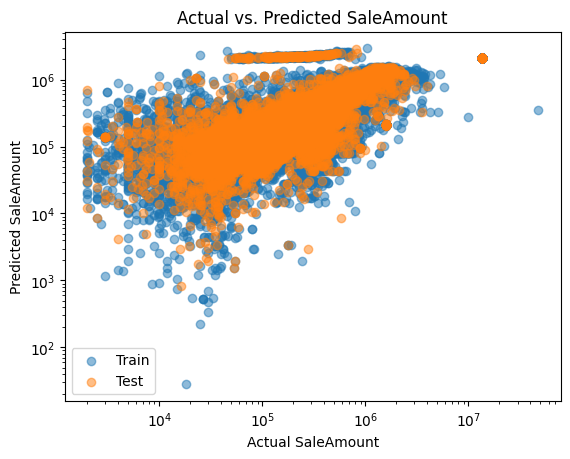

# Part 1b: Compare and contrast with Dave's regression examples

You now have an AI-generated code vs. the class materials - and I think you would agree both are pretty good! Take some time to the ChatGPT script vs. the class notes and come up with five observations of what is similar vs. different between the two examples. What is in Dave's materials that are not in the AI-generated code? And vice-versa?

### Observation 1 Feature Scaling:

Dave's examples incorporate feature scaling (e.g., using MinMaxScaler), a crucial step for many machine learning algorithms to ensure that all features contribute equally to the model. The AI-generated scripts do not include this step, potentially affecting models sensitive to feature magnitude.


### Observation 2 In-Place DataFrame Operations:

In Dave's materials, operations like dropna() are performed with inplace=True, directly modifying the DataFrame. This approach streamlines the code but requires caution. The AI-generated approach typically avoids in-place modifications, potentially making the code safer but slightly less concise.



### Observation 3 Basic Data Insights:

Both Dave and the AI code say it's really important to check how well a model works. Dave looks at things like averages and how different factors are related in the data. The AI code doesn't tell you to do that, which means you might miss out on understanding some important stuff about the data before using the model.

### Observation 4 Explicit Data Cleaning and Exploration:

Dave's materials provide detailed steps for data cleaning and exploratory data analysis (EDA), including handling missing values and exploring dataset characteristics. This detailed approach helps in understanding the dataset deeply before model training. The AI-generated code, while efficient, may skip over these explicit exploratory steps, focusing more directly on preprocessing and modeling.

### Observation 5 Visualization for Insight:

Dave employs specific visualization techniques, such as scatterplots with reference lines, to assess model fit and identify outliers. These visualizations provide valuable insights into the model's performance and data characteristics. The AI-generated code may include basic visualizations but lacks these advanced techniques for deeper analysis.

# Part 2a: Now ask ChatGPT to generate a classification recipe
With you active ChatGPT open, ask this question (or something similar):

*'Instead of a regression problem, can you update the script to be a classification problem where the target variable is 0/1 based on if the AssessedValue is greater than the mean value in that column?'*

## Your ChatGPT Screenshot
Make sure the screenshot of time and date is included in the image.

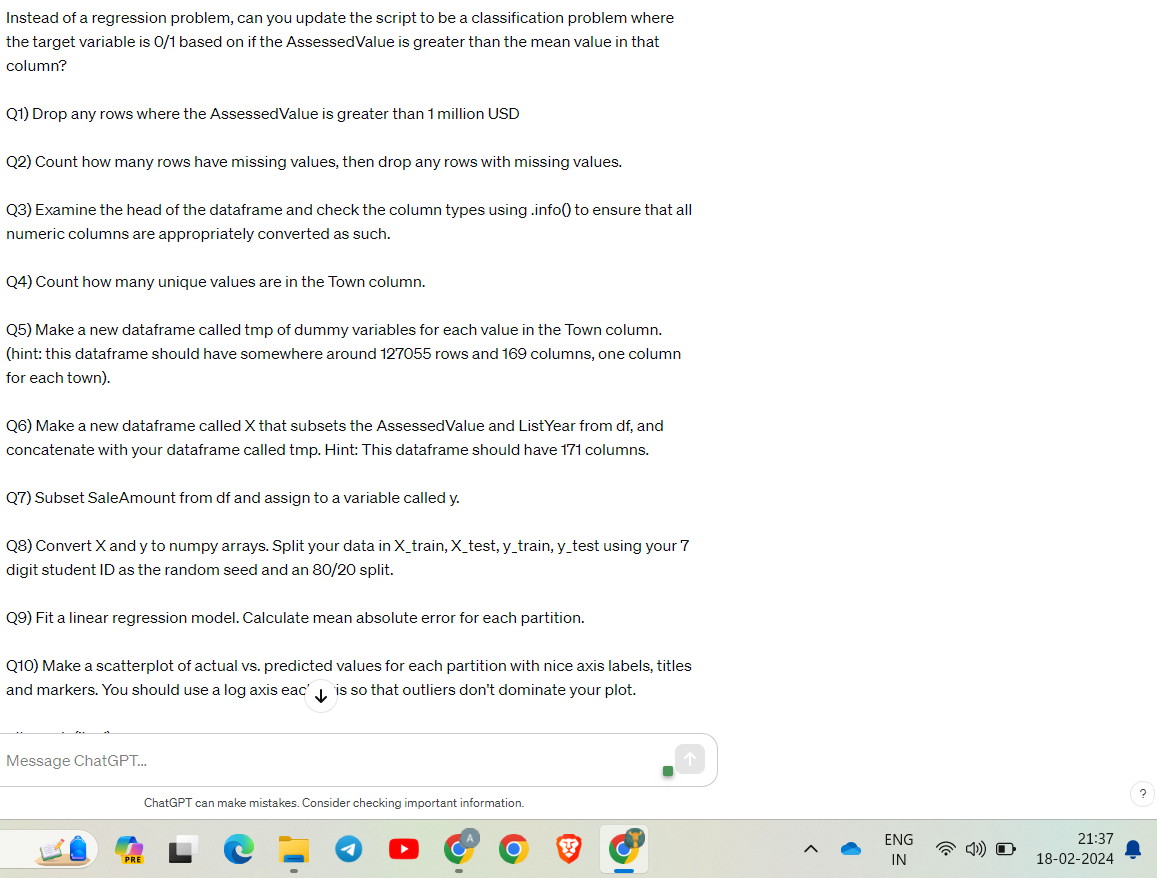

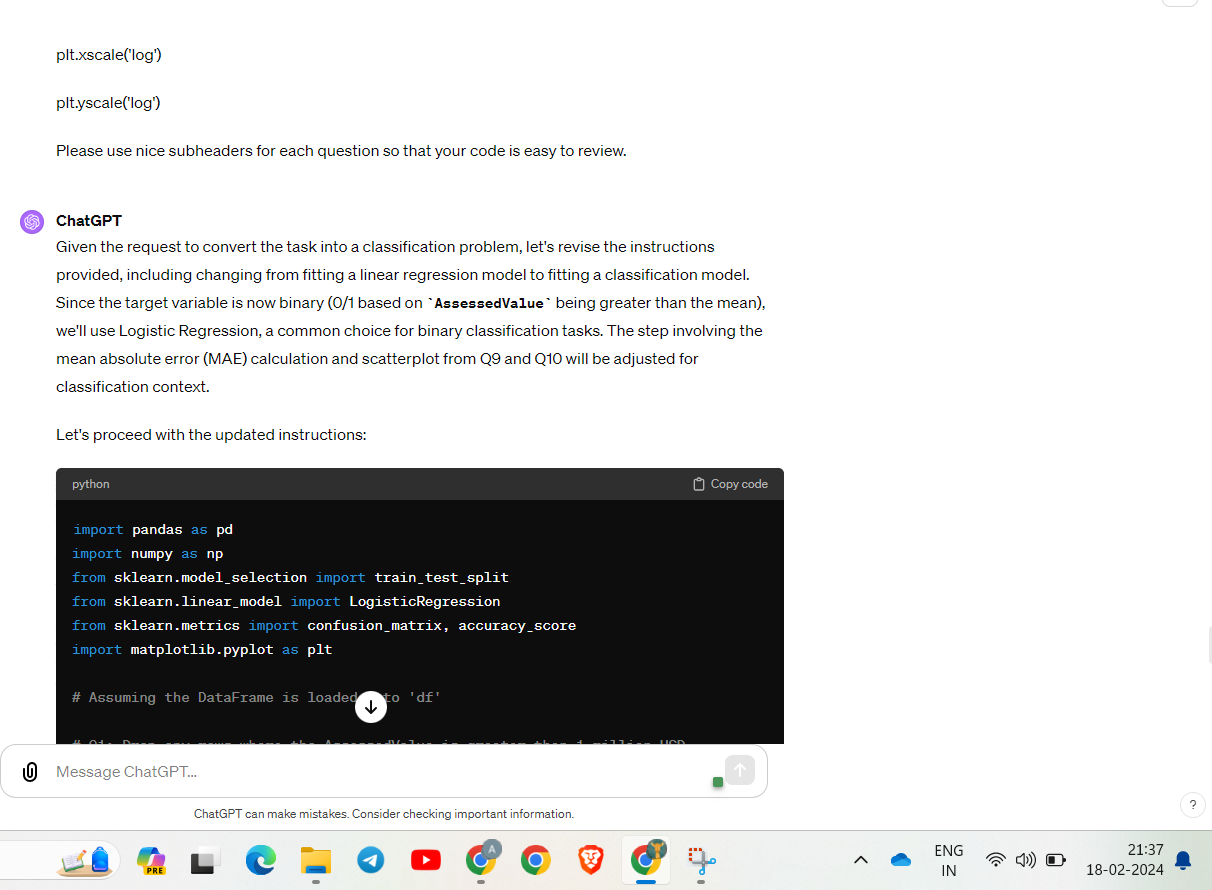

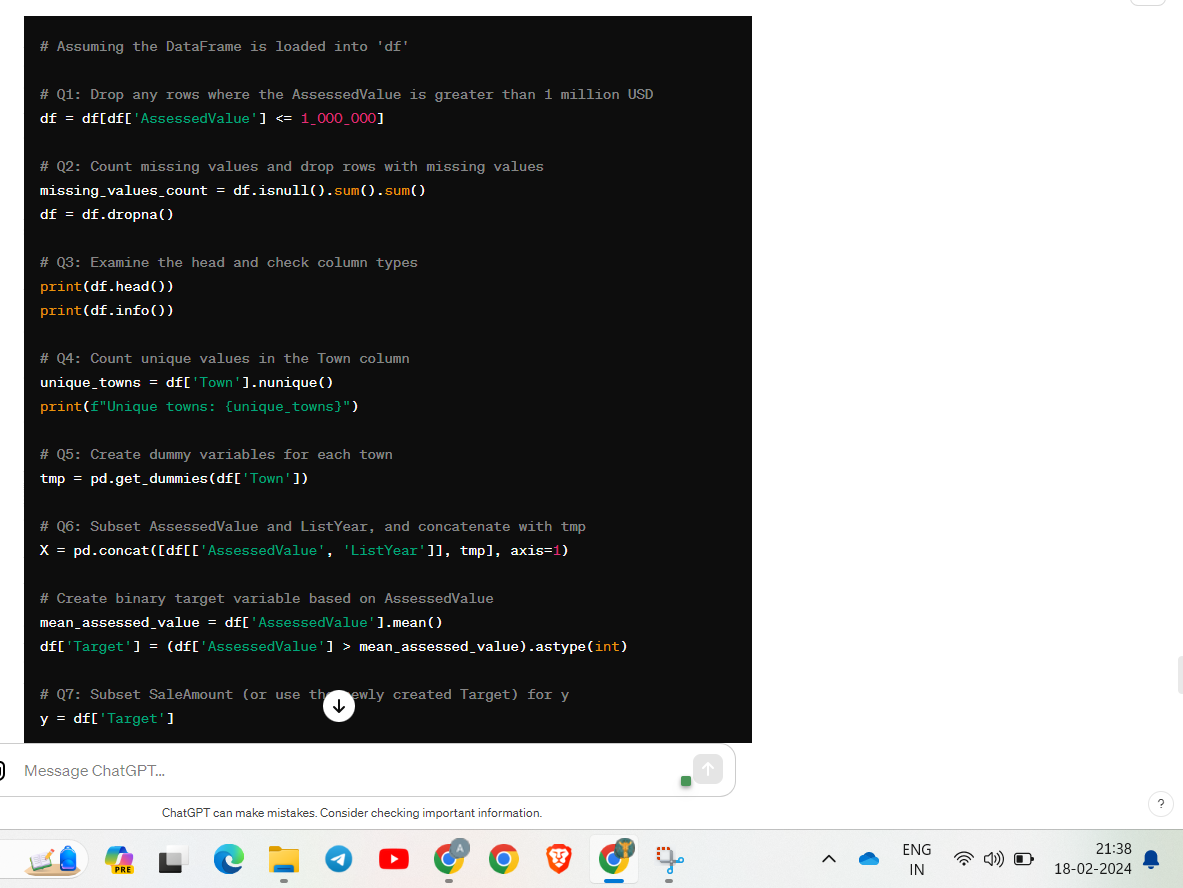

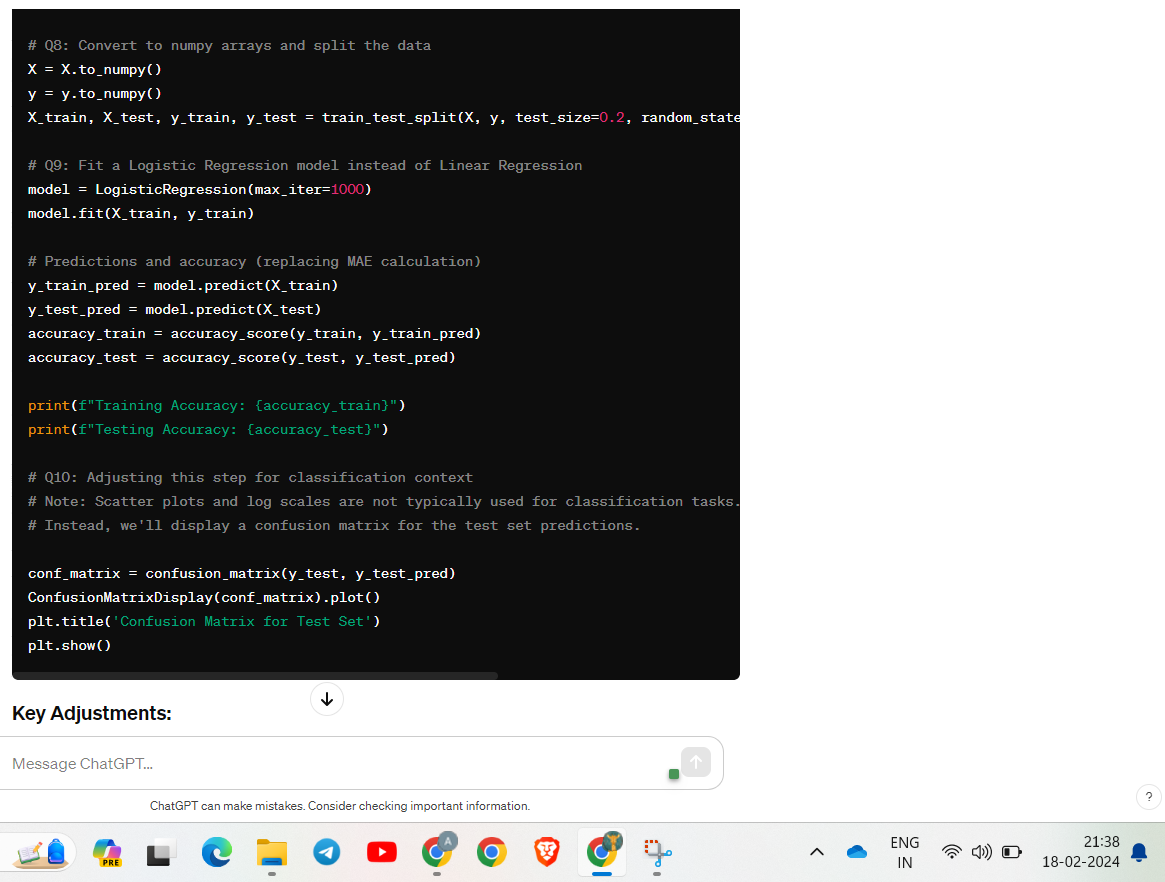

In [19]:
# students: paste both a screenshot of your prompt and code
# (for academic integrity) and your actual ChatGPT python code here

## Your ChatGPT Code
Don't just copy/paste as one cell, make nice subheaders for each question please.

   ID  SerialNumber  ListYear DateRecorded     Town            Address  \
1   2         14011      2014    1/14/2015  Andover    1 JUROVATY LANE   
2   3         15006      2015   11/30/2015  Andover        1 ROSE LANE   
3   4         14044      2014    9/28/2015  Andover  10 PINE RIDGE  DR   
4   5         14035      2014    8/10/2015  Andover       101 WALES RD   
5   6         15051      2015    9/28/2016  Andover    107 LAKESIDE DR   

   AssessedValue  SaleAmount  SalesRatio PropertyType ResidentialType  Target  \
1         153100    190000.0    0.805789  Residential   Single Family       0   
2         102900     50000.0    2.058000  Residential   Single Family       0   
3         108700    128368.0    0.846784  Residential   Single Family       0   
4         164000    230000.0    0.713043  Residential   Single Family       0   
5         188400    226000.0    0.833628  Residential   Single Family       0   

   HighValue  
1          0  
2          0  
3          0  
4       

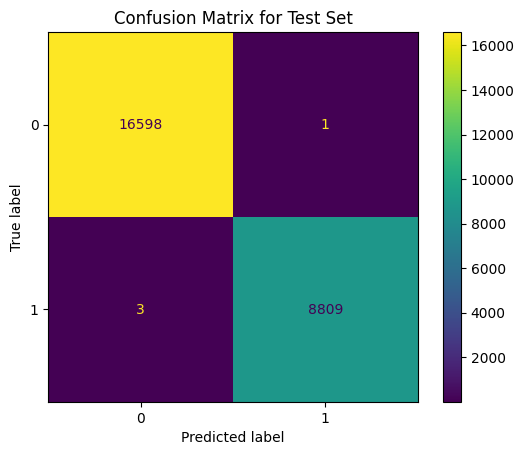

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Assuming the DataFrame is loaded into 'df'

# Q1: Drop any rows where the AssessedValue is greater than 1 million USD
df = df[df['AssessedValue'] <= 1_000_000]

# Q2: Count missing values and drop rows with missing values
missing_values_count = df.isnull().sum().sum()
df = df.dropna()

# Q3: Examine the head and check column types
print(df.head())
print(df.info())

# Q4: Count unique values in the Town column
unique_towns = df['Town'].nunique()
print(f"Unique towns: {unique_towns}")

# Q5: Create dummy variables for each town
tmp = pd.get_dummies(df['Town'])

# Q6: Subset AssessedValue and ListYear, and concatenate with tmp
X = pd.concat([df[['AssessedValue', 'ListYear']], tmp], axis=1)

# Create binary target variable based on AssessedValue
mean_assessed_value = df['AssessedValue'].mean()
df['Target'] = (df['AssessedValue'] > mean_assessed_value).astype(int)

# Q7: Subset SaleAmount (or use the newly created Target) for y
y = df['Target']

# Q8: Convert to numpy arrays and split the data
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234567)  # Replace with your student ID

# Q9: Fit a Logistic Regression model instead of Linear Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and accuracy (replacing MAE calculation)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")

# Q10: Adjusting this step for classification context
# Note: Scatter plots and log scales are not typically used for classification tasks.
# Instead, we'll display a confusion matrix for the test set predictions.

conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix for Test Set')
plt.show()


### Dave's Result

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               127055 non-null  int64  
 1   SerialNumber     127055 non-null  int64  
 2   ListYear         127055 non-null  int64  
 3   DateRecorded     127055 non-null  object 
 4   Town             127055 non-null  object 
 5   Address          127055 non-null  object 
 6   AssessedValue    127055 non-null  int64  
 7   SaleAmount       127055 non-null  float64
 8   SalesRatio       127055 non-null  float64
 9   PropertyType     127055 non-null  object 
 10  ResidentialType  127055 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 11.6+ MB
None
Unique Towns: 169
Accuracy (Train): 0.999754043524458
Accuracy (Test): 0.9998032348195663
Confusion Matrix:
[[12719     3]
 [    2 12687]]


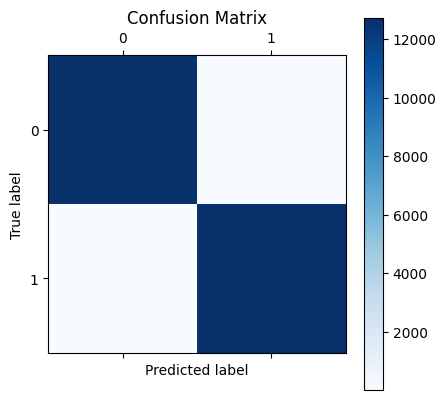

# Part 2b: Compare and contrast with Dave's classification examples

Again, you now have an AI-generated code vs. the class materials - and I think you would agree both are pretty good! Take some time to the ChatGPT script vs. the class notes and come up with five observations of what is similar vs. different between the two examples. What is in Dave's materials that are not in the AI-generated code? And vice-versa?

### Observation 1

While creating the target variable for classification, Dave's material opts for the median of the 'median_house_value' column, showcasing a preference for robust central tendency measures, in contrast to the AI script's use of the mean of the 'AssessedValue' column, indicating different approaches to categorizing continuous data into binary outcomes.

### Observation 2

Dave's evaluation of model performance was more comprehensive, including a classification report that offers a detailed breakdown of precision, recall, and F1 scores for each class, a level of detail that the AI-generated code did not achieve.

### Observation 3


Both sources emphasize the critical nature of evaluating model performance. Dave's research encompasses a range of metrics such as accuracy, confusion matrices, and classification reports tailored specifically for classification tasks, whereas ChatGPT focuses primarily on mean absolute error for regression scenarios.

### Observation 4


In Dave's methodology, there was an explicit calculation of raw predicted probabilities to provide a nuanced understanding of model predictions, a detailed analysis that was omitted in the AI-generated approach.

### Observation 5


The AI-generated code faced challenges in correctly visualizing the confusion matrix, an issue that was unexpected and highlights a potential area for improvement in handling visualization tasks.

# ❗ On Your Own
No one will really care that you can ask ChatGPT to generate some code for you - ChatGPT and similar aids are just tools to help make you a better programmer. So here's what I would do if I were you -

1. Sit down in a quiet place and open a blank notebook.
2. See if you can recreate the code perfectly within 20 minutes. Do this once a day for the entire week.
3. By the end of the week, did you find you were able to code everything in less time? Could you get it down to five minutes? If so, then you really know your stuff!
4. Vanilla regression models are cool, but why not try to  incorporate penalized regression models, or ask ChatGPT to show the coefficients and p-values in the stats models and help you interpret them?!

Feel free to leave your results below if you'd like me to review them.